In [1]:
import numpy as np
import matplotlib.pyplot as plt


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


15.5
181 119
[60. 44. 42. 34. 26.]
intercept  -0.00010635980148884449
Тангенс угла наклона (коэффициент аппроксимации): 0.000547 мм


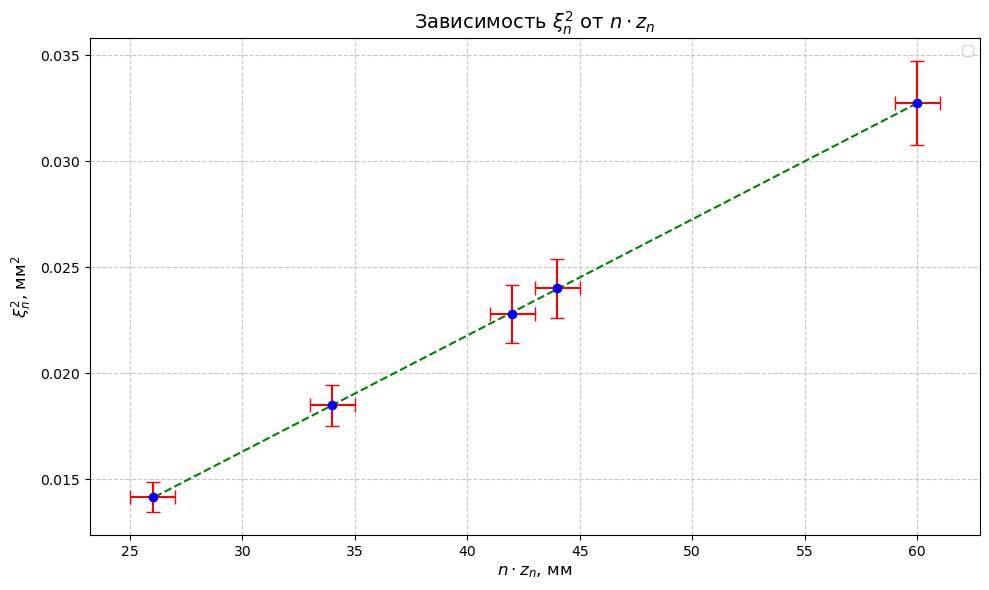

In [47]:
# Данные из таблицы (z_n должно быть задано, в примере использую z_n = [значения])
n = np.array([6, 4, 3, 2, 1])                 # Номер зоны
z_n = np.array([10.0, 11.0, 14.0, 17.0, 26.0])  # z_n в мм (пример, замените на ваши данные)
xi_n = np.array([181, 155, 151, 136, 119])  # xi_n в мкм (перевод из 2xi_n)
sigma = np.array([11, 9, 9, 7, 6])            # Погрешности в мкм

print((max(xi_n) - min(xi_n))/4)
print(max(xi_n), min(xi_n))

# Переводим единицы в мм (для согласованности)
xi_n_m = xi_n * 1e-3      # xi_n в мм
sigma_m = sigma * 1e-3 / 2    # sigma в мм

# Рассчитываем xi_n^2 и n * z_n
xi_n_squared = xi_n_m ** 2
n_times_z_n = n * z_n
print(n_times_z_n)

# Линейная аппроксимация
coefficients = np.polyfit(n_times_z_n, xi_n_squared, 1)
slope = coefficients[0]  # Тангенс угла наклона (искомый коэффициент)
intercept = coefficients[1]
print("intercept ", intercept)
fit_line = np.poly1d(coefficients)

# Погрешность измерения z_n
xerr=[1 for x in range(len(n))]

# Построение графика
plt.figure(figsize=(10, 6))
plt.errorbar(n_times_z_n, xi_n_squared, xerr=xerr, yerr=2*xi_n_m*sigma_m,
             fmt='o', color='b', ecolor='r', capsize=5)

plt.plot(n_times_z_n, fit_line(n_times_z_n), 'g--')

# Настройка графика
plt.xlabel('$n \cdot z_n$, мм', fontsize=12)
plt.ylabel('$\\xi_n^2$, мм$^2$', fontsize=12)
plt.title('Зависимость $\\xi_n^2$ от $n \cdot z_n$', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)

# Вывод тангенса угла наклона
print(f"Тангенс угла наклона (коэффициент аппроксимации): {slope:.6f} мм")

plt.tight_layout()
plt.show()
#plt.savefig("./tex/images/plot_A.png")


Коэффициент наклона: a = 0.24782 мм/ед.
Свободный член: b = -0.000 мм


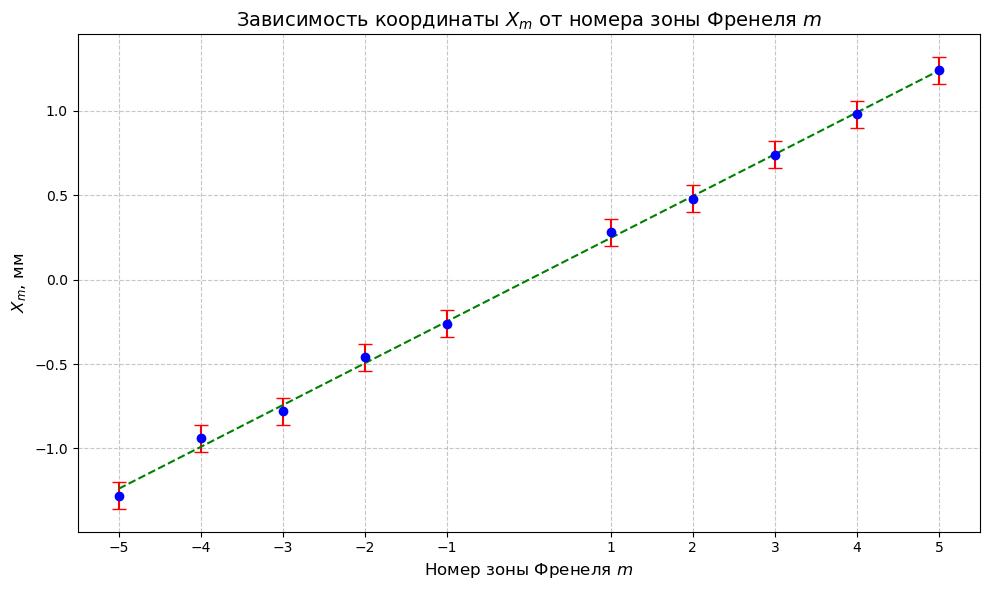

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Данные из таблицы (столбец X_m в мм)
m = np.array([-5, -4, -3, -2, -1, 1, 2, 3, 4, 5])
X_m = np.array([-1.28, -0.94, -0.78, -0.46, -0.26, 0.28, 0.48, 0.74, 0.98, 1.24])  # в мм
X_m_err = 0.08 * np.ones_like(X_m)  # Погрешность 0.02 мм для всех точек

# Линейная аппроксимация через polyfit (1 - степень полинома)
coefficients = np.polyfit(m, X_m, 1, w=1/X_m_err)  # Веса = 1/погрешности
a, b = coefficients  # Наклон (мм/ед.) и свободный член (мм)

# Создание графика
plt.figure(figsize=(10, 6))
plt.errorbar(m, X_m, yerr=X_m_err,fmt='o', color='b', ecolor='r', capsize=5)
plt.plot(m, np.polyval(coefficients, m), 'g--')

# Настройки графика
plt.xlabel('Номер зоны Френеля $m$', fontsize=12)
plt.ylabel('$X_m$, мм', fontsize=12)
plt.title('Зависимость координаты $X_m$ от номера зоны Френеля $m$', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(m)

# Вывод коэффициентов
print(f"Коэффициент наклона: a = {a:.5f} мм/ед.")
print(f"Свободный член: b = {b:.3f} мм")

plt.tight_layout()
plt.savefig("./tex/images/plot_B.png")

In [45]:
110 * 546 * 1e-6 / 0.247

0.2431578947368421